In [1]:
# SVM Classification
import pandas as pd
import numpy as np
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:
data1 = pd.read_csv('C:/Users/khann/OneDrive/Desktop/excel r assignments/SalaryData_Train(1).csv')
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data2 = pd.read_csv('C:/Users/khann/OneDrive/Desktop/excel r assignments/SalaryData_Test(1).csv')
data2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
string_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']


In [5]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in string_col:
    data1[i]=label_encoder.fit_transform(data1[i])
    data2[i]=label_encoder.fit_transform(data2[i])

In [6]:
train_x=data1.iloc[0:500,0:13]
train_y=data1.iloc[0:500,13]
test_x=data2.iloc[0:300,0:13]
test_y=data2.iloc[0:300,13]

### Grid Search CV

In [7]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [8]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.772)

In [9]:
clf = SVC(C= 15, gamma = 50)
clf.fit(train_x , train_y)
y_pred = clf.predict(test_x)
acc = accuracy_score(test_y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(test_y, y_pred)

Accuracy = 75.66666666666667


array([[227,   1],
       [ 72,   0]], dtype=int64)

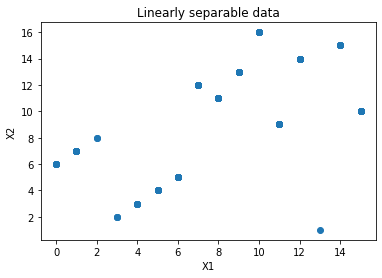

In [19]:
import matplotlib.pyplot as plt

plt.scatter(train_x.values[:,2],train_x.values[:,3])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [14]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(train_x, train_y)

In [15]:
support_vector_indices = clf.support_
print(support_vector_indices)

[  0   1   5  26  30  36  38  39  44  45  50  55  56  59  70  74  80  83
  90  94 104 107 109 112 113 119 122 123 126 138 139 141 146 147 149 153
 157 160 166 168 173 174 178 180 182 186 188 192 198 201 202 203 206 210
 213 226 240 243 251 252 262 266 269 271 275 277 293 298 301 305 307 313
 322 335 339 351 364 379 396 397 399 400 402 404 406 415 423 427 439 444
 450 453 463 464 466 468 471 479 484 486 497   7  10  11  18  19  24  42
  48  49  51  58  62  63  66  79  82  86  89  92 102 103 108 114 116 118
 125 129 133 151 159 161 167 170 171 175 183 184 187 196 199 200 217 220
 221 223 227 229 230 235 245 246 248 249 258 265 278 280 281 286 287 290
 303 324 326 328 330 334 336 341 345 360 363 369 370 373 376 385 392 398
 401 403 411 418 419 420 421 433 434 435 473 476 478 480 481 483 490]


In [16]:
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[101  96]


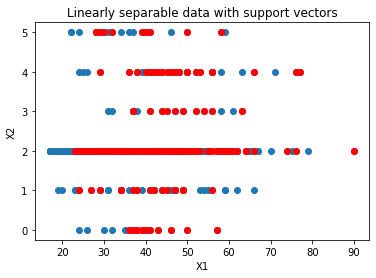

In [18]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(train_x.values[:,0],train_x.values[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()